In [1]:
import pandas as pd
import numpy as np

## Get data

In [2]:
data = pd.read_csv('games1.csv')

## Understanding the data

In [3]:
display(data.shape)
data.head()

(51490, 61)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [4]:
#data.info()

- gameId: A unique identifier for each game.
- creationTime: When the game was created.
- gameDuration: Duration of the game.
- seasonId: The season in which the game took place.
- winner: The team that won (1 or 2).
- Columns related to "first" events (firstBlood, firstTower, etc.): Indicates which team achieved that particular objective first.
- Columns with t1_ and t2_: Metrics for team 1 and team 2, respectively. These include kills, bans, etc.

# Data cleaning

In [5]:
# Change column names to lowercase snake_case
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
data.head()

,gameid,creationtime,gameduration,seasonid,winner,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,...,t2_towerkills,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


## Splitting the dataframe
Decided to split the df into 2 dfs one will have the game objectives for modeling and predictions. The other df will have all the columns related to champions(champions picked and champions banned), which will be used for statistics.

In [6]:
data.columns

Index(['gameid', 'creationtime', 'gameduration', 'seasonid', 'winner',
       'firstblood', 'firsttower', 'firstinhibitor', 'firstbaron',
       'firstdragon', 'firstriftherald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerkills', 't1_inhibitorkills', 't1_baronkills',
       't1_dragonkills', 't1_riftheraldkills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerkills', 't2_inhibitorkills', 't2_baronkills', 't2_dragonkills',
       't2_rifther

In [7]:
# Filtering the column that would be needed for the analysis
# Dropped gameid, creationtime as they are unique values and are not related to the outcome
# Dropped the 2 summoners for each champion to decrease the complexety of the model for now

data = data[['gameduration', 'firstblood', 'firsttower', 'firstinhibitor', 'firstbaron',
       'firstdragon', 'firstriftherald', 't1_champ1id', 't1_champ2id',
       't1_champ3id', 't1_champ4id', 't1_champ5id', 't1_towerkills', 't1_inhibitorkills', 't1_baronkills',
       't1_dragonkills', 't1_riftheraldkills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ2id', 't2_champ3id','t2_champ4id', 't2_champ5id',
       't2_towerkills', 't2_inhibitorkills', 't2_baronkills', 't2_dragonkills',
       't2_riftheraldkills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5', 'winner']]
data

,gameduration,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_champ1id,t1_champ2id,t1_champ3id,...,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,winner
0,1949,2,1,1,1,1,2,8,432,96,...,0,0,1,1,114,67,43,16,51,1
1,1851,1,1,1,0,1,1,119,39,76,...,0,0,0,0,11,67,238,51,420,1
2,1493,2,1,1,1,2,0,18,141,267,...,0,0,1,0,157,238,121,57,28,1
3,1758,1,1,1,1,1,0,57,63,29,...,0,0,0,0,164,18,141,40,51,1
4,2094,2,1,1,1,1,0,19,29,40,...,0,0,1,0,86,11,201,122,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,1,2,2,0,2,0,19,429,91,...,2,0,4,0,55,-1,90,238,157,2
51486,3304,1,1,2,2,2,2,90,32,31,...,7,4,4,1,157,55,119,154,105,2
51487,2156,2,2,2,0,1,0,141,18,432,...,2,0,2,0,113,122,53,11,157,2
51488,1475,2,2,2,0,2,0,121,236,420,...,3,0,1,0,154,39,51,90,114,2


### Match stats df

In [8]:
# Choosing only the colums that have match statistics
match_stats = data[['gameduration',
       'firstblood', 'firsttower', 'firstinhibitor', 'firstbaron',
       'firstdragon', 'firstriftherald', 't1_towerkills', 't1_inhibitorkills', 't1_baronkills',
       't1_dragonkills', 't1_riftheraldkills', 't2_towerkills', 't2_inhibitorkills', 't2_baronkills', 't2_dragonkills',
       't2_riftheraldkills', 'winner']]
match_stats

,gameduration,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_towerkills,t1_inhibitorkills,t1_baronkills,t1_dragonkills,t1_riftheraldkills,t2_towerkills,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,winner
0,1949,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1,1
1,1851,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0,1
2,1493,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0,1
3,1758,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0,1
4,2094,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0,2
51486,3304,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1,2
51487,2156,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0,2
51488,1475,2,2,2,0,2,0,0,0,0,0,0,11,3,0,1,0,2


### Champions df

In [9]:
# Choosing only the colums that have champion information
champs_bans = data[['t1_champ1id', 't1_champ2id',
       't1_champ3id', 't1_champ4id', 't1_champ5id', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ2id', 't2_champ3id','t2_champ4id', 't2_champ5id', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5', 'winner']]
champs_bans

# Save the data to a csv file
champs_bans.to_csv('champs_bans.csv', index=False)

### Continue with match stats df

### Data visualization

In [10]:
# Change game duration to minutes, and change column name to match
match_stats['gameduration'] = round((match_stats['gameduration'])/60,2)
match_stats.rename(columns = {'gameduration':'gameduration_minutes'}, inplace = True)
match_stats.head()


/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/2010376811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_stats['gameduration'] = round((match_stats['gameduration'])/60,2)
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/2010376811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_stats.rename(columns = {'gameduration':'gameduration_minutes'}, inplace = True)


,gameduration_minutes,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_towerkills,t1_inhibitorkills,t1_baronkills,t1_dragonkills,t1_riftheraldkills,t2_towerkills,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,winner
0,32.48,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1,1
1,30.85,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0,1
2,24.88,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0,1
3,29.30,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0,1
4,34.90,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0,1


#### Wins count plot

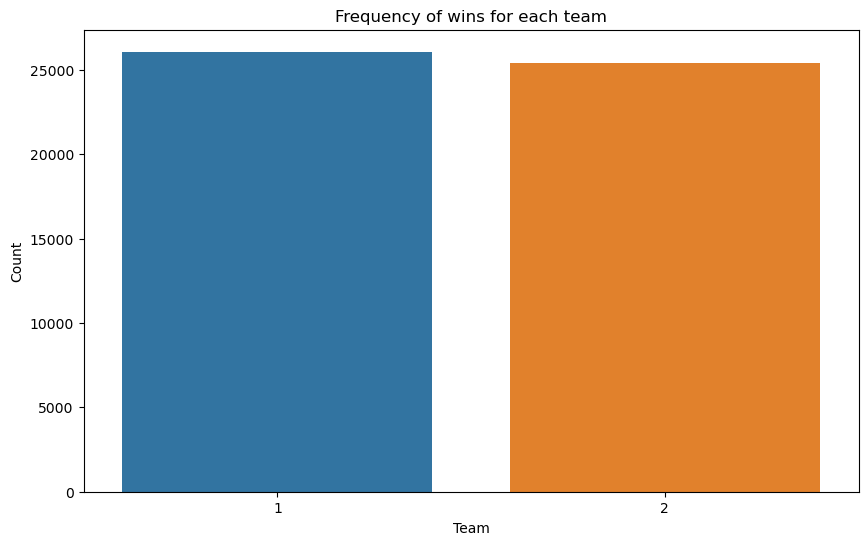

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Try to visualize the data to understand it more

# Plotting the count plot for the winners to see if there is an imbalance
plt.figure(figsize=(10,6))
sns.countplot(x='winner', data=match_stats, order=match_stats['winner'].value_counts().index)
plt.title('Frequency of wins for each team')
plt.ylabel('Count')
plt.xlabel('Team')
plt.show()

In [12]:
team1_objectives = ['t1_towerkills', 't1_inhibitorkills', 't1_baronkills',
       't1_dragonkills', 't1_riftheraldkills']
team2_objectives = ['t2_towerkills', 't2_inhibitorkills', 't2_baronkills', 't2_dragonkills',
       't2_riftheraldkills']

#### Count plots for the objectives

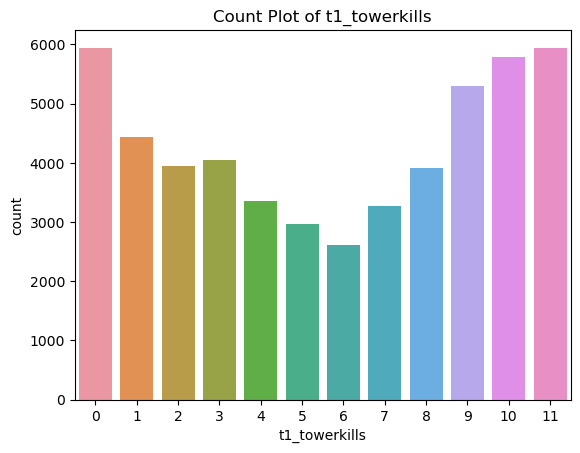

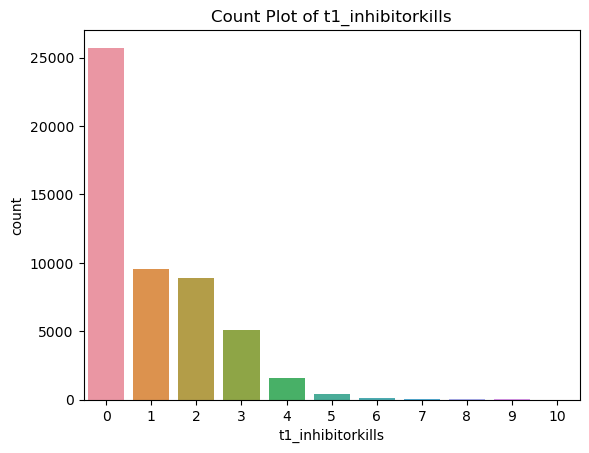

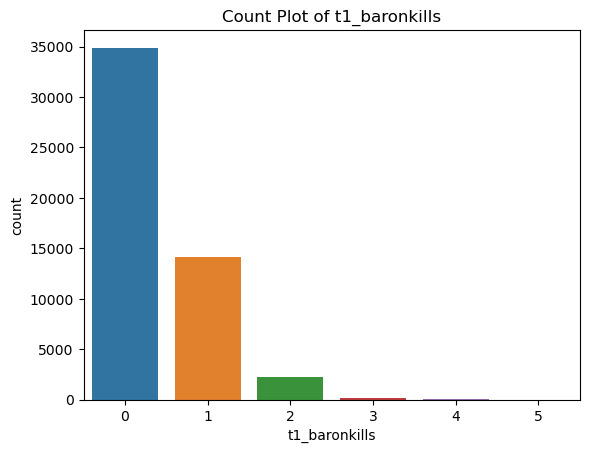

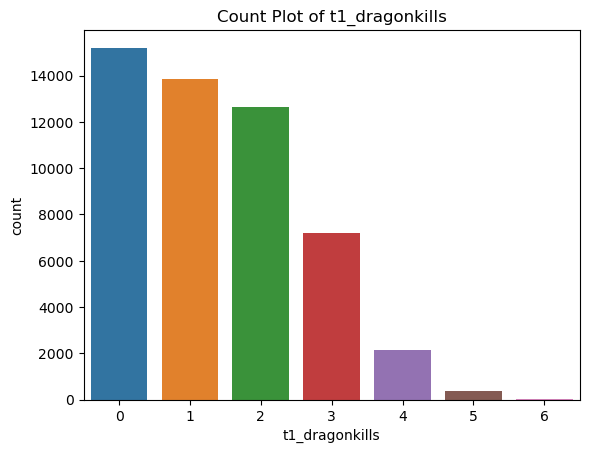

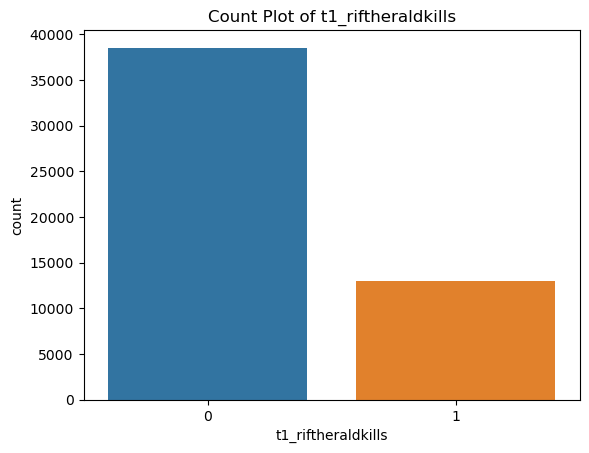

In [13]:
for col in team1_objectives:
    sns.countplot(x=col, data=match_stats)
    plt.title(f'Count Plot of {col}')
    plt.show()

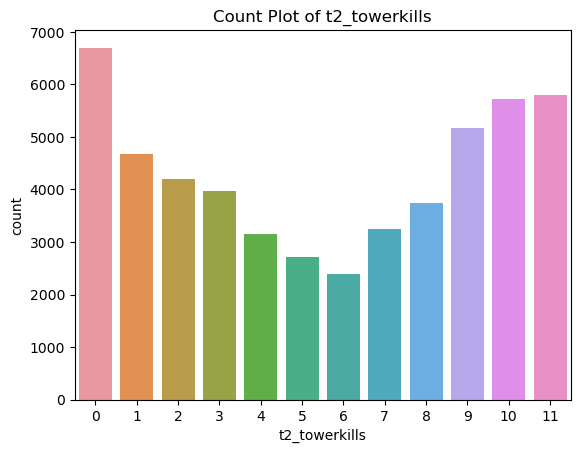

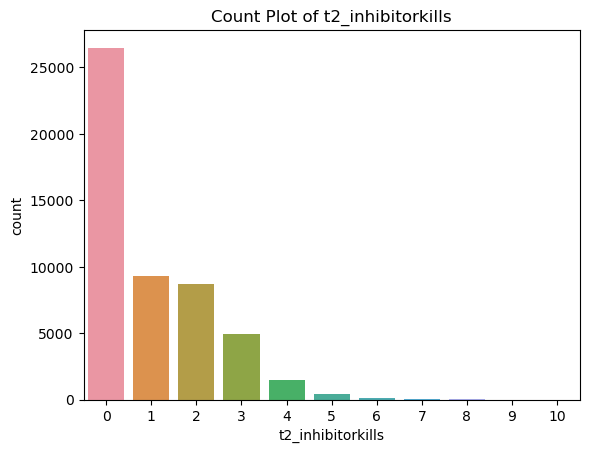

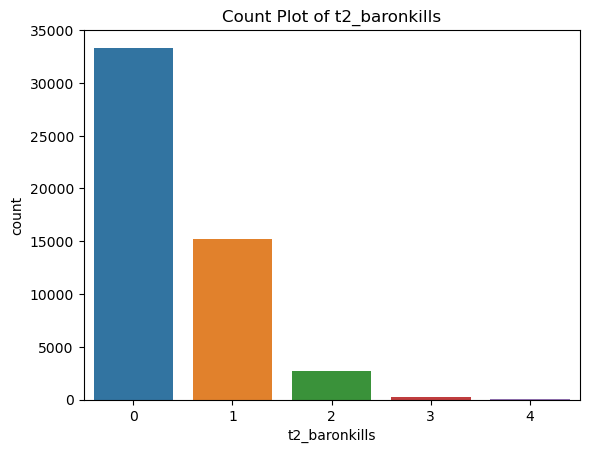

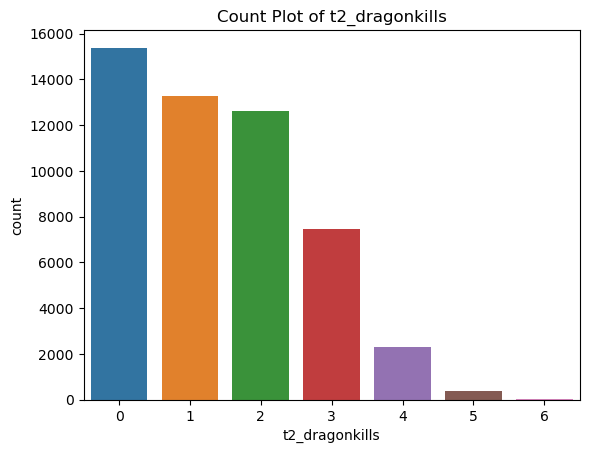

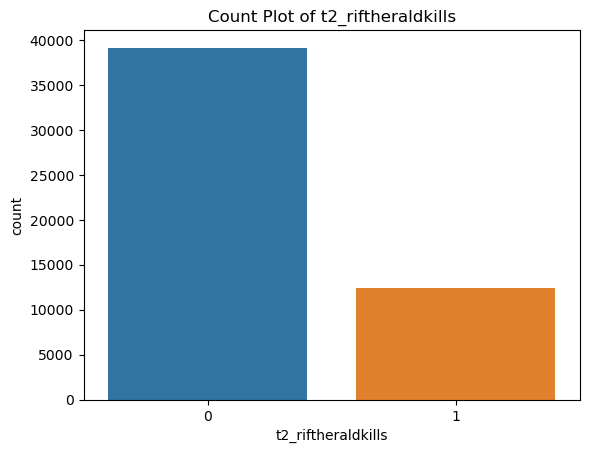

In [14]:
for col in team2_objectives:
    sns.countplot(x=col, data=match_stats)
    plt.title(f'Count Plot of {col}')
    plt.show()

- Since the wins count is almost the same for both teams, we'd expect that the objectives distributions will be close for team 1 and team 2
- This is confirmed by the count plots for the objectives

#### Distribution of game duration

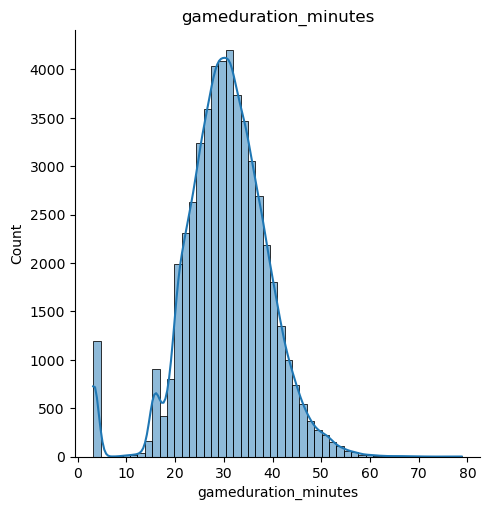

In [15]:
# To check the game duration
sns.displot(match_stats['gameduration_minutes'], kde=True, bins=50)
plt.title('gameduration_minutes')
plt.show()

In the game any match that is under 10 minutes is probably remade game. Remake a game: means one of the players ledt the game and the game is dropped but it doesn't count as aloss, so it won't be very accurate to take these results into the model.

In [16]:
# Check the rows that have game duration under 10 minutes
# These game have a low numbers of objectives which could be due to a player leaving early then the game being remade
under_ten = match_stats[match_stats['gameduration_minutes'] < 10]
under_ten

,gameduration_minutes,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_towerkills,t1_inhibitorkills,t1_baronkills,t1_dragonkills,t1_riftheraldkills,t2_towerkills,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,winner
64,3.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
82,3.22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
119,3.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
149,3.47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
276,3.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51309,9.75,1,1,1,0,0,0,5,1,0,0,0,0,0,0,0,0,1
51359,3.37,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51412,3.23,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
51417,3.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [17]:
# Filter the data set to include only the games with a duration over 10 minutes
match_stats= match_stats[match_stats['gameduration_minutes'] > 10]

### Adjusting columns

In [18]:
# To get an overview of the numerical columns
match_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
gameduration_minutes,50286.0,31.189772,7.514585,10.17,25.9,30.77,35.945,78.8
firstblood,50286.0,1.487233,0.499842,1.00,1.0,1.00,2.000,2.0
firsttower,50286.0,1.485125,0.500499,0.00,1.0,1.00,2.000,2.0
firstinhibitor,50286.0,1.339578,0.652960,0.00,1.0,1.00,2.000,2.0
firstbaron,50286.0,0.948693,0.838988,0.00,0.0,1.00,2.000,2.0
firstdragon,50286.0,1.477270,0.530346,0.00,1.0,1.00,2.000,2.0
firstriftherald,50286.0,0.749195,0.824393,0.00,0.0,1.00,1.000,2.0
t1_towerkills,50286.0,5.835163,3.740575,0.00,2.0,6.00,9.000,11.0
t1_inhibitorkills,50286.0,1.041781,1.269064,0.00,0.0,1.00,2.000,10.0
t1_baronkills,50286.0,0.381200,0.588001,0.00,0.0,0.00,1.000,5.0


#### Encoding the columns with Team 1 and Team 2 to 1 and 0 respectively

In [19]:
# List of columns to be encoded
team_column = ['firstblood', 'firsttower', 'firstinhibitor',
       'firstbaron', 'firstdragon', 'firstriftherald', 'winner']

# For loop to go through the columns to change 1 and 2 to 1 and 0 respectively
for col in team_column:
    match_stats[col] = match_stats[col].apply(lambda x: np.where(x == 2, 0, 1))
    
match_stats

/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/2509289085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_stats[col] = match_stats[col].apply(lambda x: np.where(x == 2, 0, 1))


,gameduration_minutes,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_towerkills,t1_inhibitorkills,t1_baronkills,t1_dragonkills,t1_riftheraldkills,t2_towerkills,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,winner
0,32.48,0,1,1,1,1,0,11,1,2,3,0,5,0,0,1,1,1
1,30.85,1,1,1,1,1,1,10,4,0,2,1,2,0,0,0,0,1
2,24.88,0,1,1,1,0,1,8,1,1,1,0,2,0,0,1,0,1
3,29.30,1,1,1,1,1,1,9,2,1,2,0,0,0,0,0,0,1
4,34.90,0,1,1,1,1,1,9,2,1,3,0,3,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,32.40,1,0,0,1,0,1,2,0,0,0,0,10,2,0,4,0,0
51486,55.07,1,1,0,0,0,0,5,4,0,2,0,11,7,4,4,1,0
51487,35.93,0,0,0,1,1,1,0,0,0,1,0,10,2,0,2,0,0
51488,24.58,0,0,0,1,0,1,0,0,0,0,0,11,3,0,1,0,0


### Creating new columns to calculate the difference in team objectives (Team1-Team2)
This will allow the columns to be related to the winner column

In [20]:
#match_stats.columns

In [21]:
# List of column pairs to subtract
column_pairs = [('t1_towerkills', 't2_towerkills'), ('t1_inhibitorkills', 't2_inhibitorkills'),('t1_baronkills', 't2_baronkills'),
               ('t1_dragonkills', 't2_dragonkills'), ('t1_riftheraldkills', 't2_riftheraldkills')]

# Loop through pairs and create new columns
for col1, col2 in column_pairs:
    new_col_name = f"{col1}_minus_{col2}"
    match_stats[new_col_name] = match_stats[col1] - match_stats[col2]
    
match_stats


/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/1083304992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_stats[new_col_name] = match_stats[col1] - match_stats[col2]
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/1083304992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_stats[new_col_name] = match_stats[col1] - match_stats[col2]
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/1083304992.py:8: SettingWithCopyWarning: 
A value is trying

,gameduration_minutes,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_towerkills,t1_inhibitorkills,t1_baronkills,...,t2_inhibitorkills,t2_baronkills,t2_dragonkills,t2_riftheraldkills,winner,t1_towerkills_minus_t2_towerkills,t1_inhibitorkills_minus_t2_inhibitorkills,t1_baronkills_minus_t2_baronkills,t1_dragonkills_minus_t2_dragonkills,t1_riftheraldkills_minus_t2_riftheraldkills
0,32.48,0,1,1,1,1,0,11,1,2,...,0,0,1,1,1,6,1,2,2,-1
1,30.85,1,1,1,1,1,1,10,4,0,...,0,0,0,0,1,8,4,0,2,1
2,24.88,0,1,1,1,0,1,8,1,1,...,0,0,1,0,1,6,1,1,0,0
3,29.30,1,1,1,1,1,1,9,2,1,...,0,0,0,0,1,9,2,1,2,0
4,34.90,0,1,1,1,1,1,9,2,1,...,0,0,1,0,1,6,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,32.40,1,0,0,1,0,1,2,0,0,...,2,0,4,0,0,-8,-2,0,-4,0
51486,55.07,1,1,0,0,0,0,5,4,0,...,7,4,4,1,0,-6,-3,-4,-2,-1
51487,35.93,0,0,0,1,1,1,0,0,0,...,2,0,2,0,0,-10,-2,0,-1,0
51488,24.58,0,0,0,1,0,1,0,0,0,...,3,0,1,0,0,-11,-3,0,-1,0


In [22]:
match_stats.columns

Index(['gameduration_minutes', 'firstblood', 'firsttower', 'firstinhibitor',
       'firstbaron', 'firstdragon', 'firstriftherald', 't1_towerkills',
       't1_inhibitorkills', 't1_baronkills', 't1_dragonkills',
       't1_riftheraldkills', 't2_towerkills', 't2_inhibitorkills',
       't2_baronkills', 't2_dragonkills', 't2_riftheraldkills', 'winner',
       't1_towerkills_minus_t2_towerkills',
       't1_inhibitorkills_minus_t2_inhibitorkills',
       't1_baronkills_minus_t2_baronkills',
       't1_dragonkills_minus_t2_dragonkills',
       't1_riftheraldkills_minus_t2_riftheraldkills'],
      dtype='object')

#### Create a new df with the new columns and the encoded columns from before

In [23]:
adjusted_match_stats = match_stats[['gameduration_minutes', 'firstblood', 'firsttower', 'firstinhibitor',
       'firstbaron', 'firstdragon', 'firstriftherald', 't1_towerkills_minus_t2_towerkills',
       't1_inhibitorkills_minus_t2_inhibitorkills',
       't1_baronkills_minus_t2_baronkills',
       't1_dragonkills_minus_t2_dragonkills',
       't1_riftheraldkills_minus_t2_riftheraldkills', 'winner']]
adjusted_match_stats

,gameduration_minutes,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftherald,t1_towerkills_minus_t2_towerkills,t1_inhibitorkills_minus_t2_inhibitorkills,t1_baronkills_minus_t2_baronkills,t1_dragonkills_minus_t2_dragonkills,t1_riftheraldkills_minus_t2_riftheraldkills,winner
0,32.48,0,1,1,1,1,0,6,1,2,2,-1,1
1,30.85,1,1,1,1,1,1,8,4,0,2,1,1
2,24.88,0,1,1,1,0,1,6,1,1,0,0,1
3,29.30,1,1,1,1,1,1,9,2,1,2,0,1
4,34.90,0,1,1,1,1,1,6,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,32.40,1,0,0,1,0,1,-8,-2,0,-4,0,0
51486,55.07,1,1,0,0,0,0,-6,-3,-4,-2,-1,0
51487,35.93,0,0,0,1,1,1,-10,-2,0,-1,0,0
51488,24.58,0,0,0,1,0,1,-11,-3,0,-1,0,0


### Correlation matrix

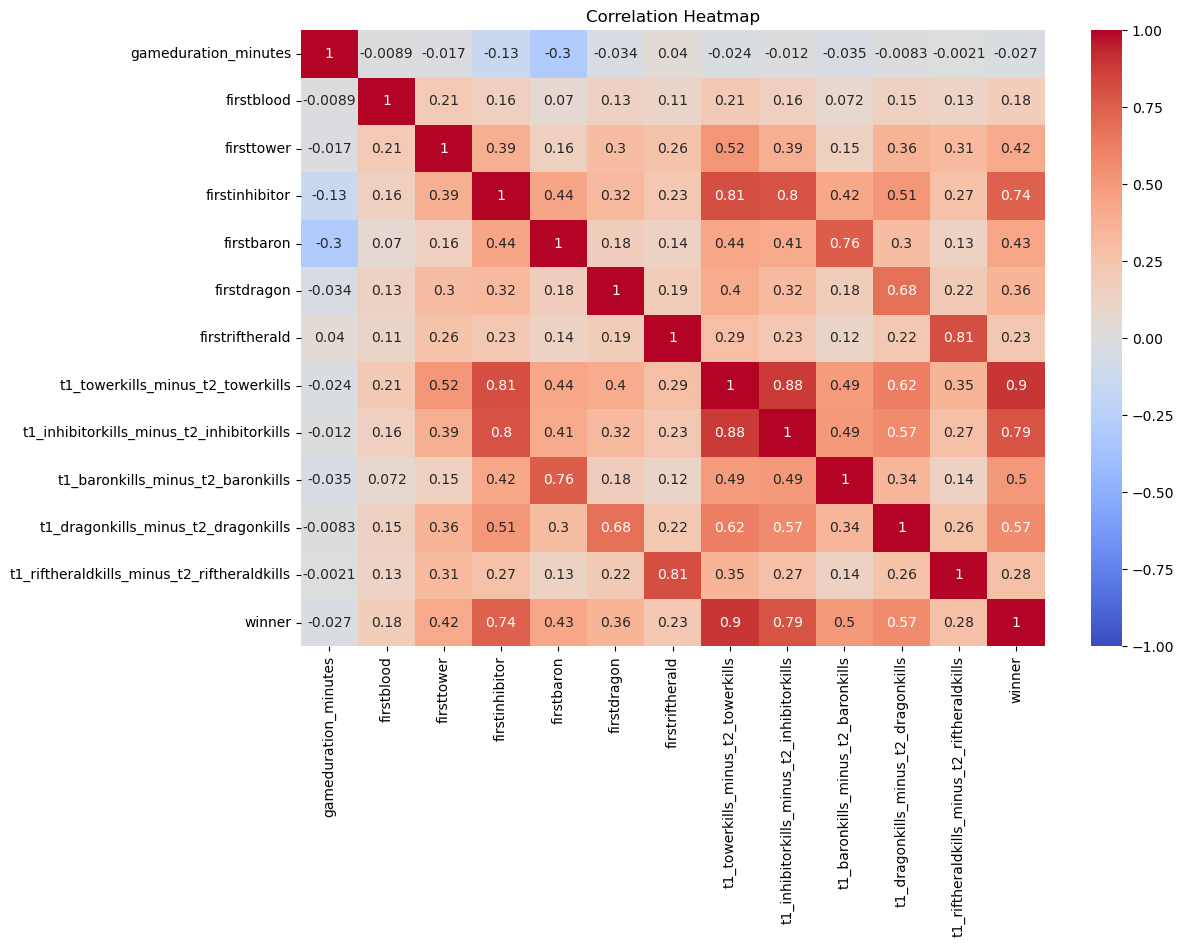

In [24]:
correlation_matrix = adjusted_match_stats.corr()
correlation_matrix

# Heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

- Some features have high correlation to the target, from the game objectives this to be expected. The tower kills difference has the highest correlation value
- Tower kills and inhibitor kills are highly correlated (0.88) and in game they are related also, The inhibitor kills column will be dropped

#### Add new columns that have interactive features ex. team that gets first blood and first tower


In [25]:
# drop duplicates
adjusted_match_stats.drop_duplicates(keep='first', inplace=True)
adjusted_match_stats.shape
adjusted_match_stats.describe().T

/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/61784627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_match_stats.drop_duplicates(keep='first', inplace=True)


,count,mean,std,min,25%,50%,75%,max
gameduration_minutes,49469.0,31.245644,7.499518,10.17,26.0,30.82,35.98,78.8
firstblood,49469.0,0.512240,0.499855,0.00,0.0,1.00,1.00,1.0
firsttower,49469.0,0.514019,0.499808,0.00,0.0,1.00,1.00,1.0
firstinhibitor,49469.0,0.558329,0.496591,0.00,0.0,1.00,1.00,1.0
firstbaron,49469.0,0.671127,0.469808,0.00,0.0,1.00,1.00,1.0
firstdragon,49469.0,0.505973,0.499969,0.00,0.0,1.00,1.00,1.0
firstriftherald,49469.0,0.753704,0.430857,0.00,1.0,1.00,1.00,1.0
t1_towerkills_minus_t2_towerkills,49469.0,0.146880,6.812926,-11.00,-6.0,0.00,7.00,11.0
t1_inhibitorkills_minus_t2_inhibitorkills,49469.0,0.032606,2.142222,-10.00,-2.0,0.00,2.00,10.0
t1_baronkills_minus_t2_baronkills,49469.0,-0.043259,0.937087,-4.00,-1.0,0.00,1.00,5.0


## Model preparation

### X-y split

In [26]:
y = adjusted_match_stats['winner']
X = adjusted_match_stats.drop(['winner','t1_inhibitorkills_minus_t2_inhibitorkills'], axis=1)

### Train-Test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

### Split into numerical and categorical

In [28]:
#X_train.columns

In [29]:
X_train_num = X_train[['gameduration_minutes', 't1_towerkills_minus_t2_towerkills',
       't1_baronkills_minus_t2_baronkills',
       't1_dragonkills_minus_t2_dragonkills',
       't1_riftheraldkills_minus_t2_riftheraldkills']]
X_test_num = X_test[['gameduration_minutes', 't1_towerkills_minus_t2_towerkills',
       't1_baronkills_minus_t2_baronkills',
       't1_dragonkills_minus_t2_dragonkills',
       't1_riftheraldkills_minus_t2_riftheraldkills']]
X_train_encoded = X_train[['firstblood', 'firsttower', 'firstinhibitor',
       'firstbaron', 'firstdragon', 'firstriftherald']]
X_test_encoded = X_test[['firstblood', 'firsttower', 'firstinhibitor',
       'firstbaron', 'firstdragon', 'firstriftherald']]

In [30]:
# reset index for the categorical
X_train_encoded.reset_index(drop=True, inplace=True)
X_test_encoded.reset_index(drop=True, inplace=True)

### Normalize the numerical columns with StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train_num)

# Transform the data
X_train_scaled = scaler.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)


In [32]:
X_test_scaled

,gameduration_minutes,t1_towerkills_minus_t2_towerkills,t1_baronkills_minus_t2_baronkills,t1_dragonkills_minus_t2_dragonkills,t1_riftheraldkills_minus_t2_riftheraldkills
0,-2.037838,0.272754,0.044107,0.007352,-0.015453
1,0.444236,-0.755451,-1.023500,-1.875800,-0.015453
2,-1.725083,-1.342997,0.044107,-0.934224,-0.015453
3,1.410448,-0.608565,-1.023500,-0.463436,-1.424558
4,-0.506005,1.007187,0.044107,0.007352,1.393652
...,...,...,...,...,...
9889,-0.088112,-1.489884,-1.023500,0.478140,-0.015453
9890,-0.270441,-1.196111,0.044107,-0.463436,-1.424558
9891,1.575476,-0.755451,-1.023500,0.007352,-0.015453
9892,1.550190,1.007187,1.111714,1.890503,1.393652


In [33]:
# Concat to array
#X_train = np.concatenate((X_train_scaled,X_train_encoded),axis=1)
#X_test = np.concatenate((X_test_scaled,X_test_encoded),axis=1)

In [34]:
X_train = pd.concat([X_train_scaled,X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled,X_test_encoded], axis=1)

In [35]:
# to check that the concat had no problems
X_train.isna().sum()

gameduration_minutes                           0
t1_towerkills_minus_t2_towerkills              0
t1_baronkills_minus_t2_baronkills              0
t1_dragonkills_minus_t2_dragonkills            0
t1_riftheraldkills_minus_t2_riftheraldkills    0
firstblood                                     0
firsttower                                     0
firstinhibitor                                 0
firstbaron                                     0
firstdragon                                    0
firstriftherald                                0
dtype: int64

## Model

### Model training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Logistic regression

In [37]:
# Initialize and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
logistic_pred_train = lr.predict(X_train)
logistic_pred_test = lr.predict(X_test)


# Evaluate the model
logistic_accuracy_train = accuracy_score(y_train, logistic_pred_train)
print(f'Logistic Regression Accuracy Train: {logistic_accuracy_train}')

logistic_accuracy_test = accuracy_score(y_test, logistic_pred_test)
print(f'Logistic Regression Accuracy Test: {logistic_accuracy_test}')
print(classification_report(y_test, logistic_pred_test))


Logistic Regression Accuracy Train: 0.9730132659507265
Logistic Regression Accuracy Test: 0.9702850212249848
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4891
           1       0.97      0.97      0.97      5003

    accuracy                           0.97      9894
   macro avg       0.97      0.97      0.97      9894
weighted avg       0.97      0.97      0.97      9894



### We don't get a lot of info from this model as we are predicting the past.

### Another model to predict the outcome only from who captured which objective first

In [38]:
# X-y split
y = adjusted_match_stats['winner']
X = adjusted_match_stats.drop(['winner', 'gameduration_minutes', 't1_towerkills_minus_t2_towerkills', 't1_inhibitorkills_minus_t2_inhibitorkills',
       't1_baronkills_minus_t2_baronkills',
       't1_dragonkills_minus_t2_dragonkills',
       't1_riftheraldkills_minus_t2_riftheraldkills'], axis=1)

In [39]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
# Initialize and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
logistic_pred_train = lr.predict(X_train)
logistic_pred_test = lr.predict(X_test)


# Evaluate the model
logistic_accuracy_train = accuracy_score(y_train, logistic_pred_train)
print(f'Logistic Regression Accuracy Train: {logistic_accuracy_train}')

logistic_accuracy_test = accuracy_score(y_test, logistic_pred_test)
print(f'Logistic Regression Accuracy Test: {logistic_accuracy_test}')
print(classification_report(y_test, logistic_pred_test))

Logistic Regression Accuracy Train: 0.8700694883133291
Logistic Regression Accuracy Test: 0.8721447341823327
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      4874
           1       0.85      0.91      0.88      5020

    accuracy                           0.87      9894
   macro avg       0.87      0.87      0.87      9894
weighted avg       0.87      0.87      0.87      9894



In [41]:
# Extract the coefficients from the fitted logistic regression model
coefs = lr.coef_[0]

# Calculate the change in probabilities
prob_changes = np.exp(coefs) / (1 + np.exp(coefs))

# Create a DataFrame
coef_prob_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefs,
    'Probability_Change': prob_changes
})

# Sort by the probability change for better visualization
coef_prob_df = coef_prob_df.sort_values('Probability_Change', ascending=False)

In [42]:
coef_prob_df

,Feature,Coefficient,Probability_Change
2,firstinhibitor,3.318831,0.965069
3,firstbaron,1.159891,0.761313
1,firsttower,0.970699,0.725259
4,firstdragon,0.818355,0.693887
0,firstblood,0.329790,0.581708
5,firstriftherald,0.185287,0.546190


In [43]:
# save as a csv to be used for data visualization
coef_prob_df.to_csv('coef_prob_df.csv', index=False)

## XGBoost model
- Trying a different model to see the effect on the importance of features
- I chose the XGBoost as it can provide directly the feature importnce table

In [44]:
from xgboost import XGBClassifier
# Initialize and fit the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f'XGBoost Accuracy: {xgb_accuracy}')

XGBoost Accuracy: 0.8716393774004447


In [45]:
# Get feature importances
xgb_importances = xgb_model.feature_importances_

# Convert to a DataFrame
xgb_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_importances})

xgb_importance_df.sort_values('importance', ascending=False)


,feature,importance
2,firstinhibitor,0.974194
3,firstbaron,0.010235
1,firsttower,0.008396
4,firstdragon,0.006540
0,firstblood,0.000500
5,firstriftherald,0.000134


## Decided to check the importance of the first objective captures and which pair is the most important
(can be expanded to link more features)

### First build a df with all the possible pairing

In [46]:
first_objectives = adjusted_match_stats[['firstblood', 'firsttower', 'firstinhibitor','firstdragon','firstriftherald','firstbaron']]

In [47]:
# Nested for loop with a +1 offset to prevent duplicates and to pair all the objectives

# List of first objective columns
objective_cols = ['firstblood', 'firsttower', 'firstinhibitor','firstdragon','firstriftherald','firstbaron']

# Create a new DataFrame to hold the interaction terms
interaction_df = pd.DataFrame()

# Generate interaction features
for i in range(len(objective_cols)):
    for j in range(i+1, len(objective_cols)):
        col1 = objective_cols[i]
        col2 = objective_cols[j]
        interaction_term = f"{col1}_{col2}"
        
        interaction_df[interaction_term] = first_objectives[col1] * first_objectives[col2]

# Concatenate the original DataFrame with the interaction features
#df_with_interaction = pd.concat([first_objectives, interaction_df], axis=1)
#df_with_interaction
interaction_df

,firstblood_firsttower,firstblood_firstinhibitor,firstblood_firstdragon,firstblood_firstriftherald,firstblood_firstbaron,firsttower_firstinhibitor,firsttower_firstdragon,firsttower_firstriftherald,firsttower_firstbaron,firstinhibitor_firstdragon,firstinhibitor_firstriftherald,firstinhibitor_firstbaron,firstdragon_firstriftherald,firstdragon_firstbaron,firstriftherald_firstbaron
0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
51486,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51487,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
51488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### X-y split

In [48]:
y = adjusted_match_stats['winner']
X = interaction_df

### Train-Test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic regression model

In [50]:
# Initialize and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
logistic_pred_train = lr.predict(X_train)
logistic_pred_test = lr.predict(X_test)


# Evaluate the model
logistic_accuracy_train = accuracy_score(y_train, logistic_pred_train)
print(f'Logistic Regression Accuracy Train: {logistic_accuracy_train}')

logistic_accuracy_test = accuracy_score(y_test, logistic_pred_test)
print(f'Logistic Regression Accuracy Test: {logistic_accuracy_test}')
print(classification_report(y_test, logistic_pred_test))

Logistic Regression Accuracy Train: 0.8663550221099179
Logistic Regression Accuracy Test: 0.8633515261774813
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4850
           1       0.87      0.87      0.87      5044

    accuracy                           0.86      9894
   macro avg       0.86      0.86      0.86      9894
weighted avg       0.86      0.86      0.86      9894



### Coefficients and probablilty 

In [82]:
# Extract the coefficients from the fitted logistic regression model
coefs = lr.coef_[0]

# Calculate the change in probabilities
prob_changes = np.exp(coefs) / (1 + np.exp(coefs))

# Create a DataFrame
coef_prob_df1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefs,
    'Probability_Change': prob_changes
})

# Sort by the probability change for better visualization
coef_prob_df1 = coef_prob_df1.sort_values('Probability_Change', ascending=False)

In [83]:
coef_prob_df1

,Feature,Coefficient,Probability_Change
11,firstinhibitor_firstbaron,1.657339,0.839880
10,firstinhibitor_firstriftherald,1.076007,0.745738
5,firsttower_firstinhibitor,1.031996,0.737303
1,firstblood_firstinhibitor,0.873169,0.705405
9,firstinhibitor_firstdragon,0.869854,0.704715
8,firsttower_firstbaron,0.804835,0.691008
13,firstdragon_firstbaron,0.332316,0.582323
4,firstblood_firstbaron,0.098649,0.524642
2,firstblood_firstdragon,0.072792,0.518190
12,firstdragon_firstriftherald,0.067876,0.516963


In [84]:
# save as a csv to be used for data visualization
coef_prob_df1.to_csv('coef_prob_df1.csv', index=False)

## Champ-Bans data

## Building a model to check which team composition has the highest chance of winning

### First make new columns that combine team comp and new columns that combine ban choices

In [54]:
champs_bans.columns

Index(['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id',
       't1_champ5id', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5',
       't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id',
       't2_champ5id', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5',
       'winner'],
      dtype='object')

In [55]:
# Function to combine champions for a single row for team2
def team1_champs(row):
    return [row['t1_champ1id'], row['t1_champ2id'], row['t1_champ3id'], row['t1_champ4id'], row['t1_champ5id']]

# Function to combine champions for a single row for team2
def team2_champs(row):
    return [row['t2_champ1id'], row['t2_champ2id'], row['t2_champ3id'], row['t2_champ4id'], row['t2_champ5id']]

def team1_bans(row):
    return [row['t1_ban1'], row['t1_ban2'], row['t1_ban3'], row['t1_ban4'], row['t1_ban5']]

# Function to combine champions for a single row for team2
def team2_bans(row):
    return [row['t2_ban1'], row['t2_ban1'], row['t2_ban1'], row['t2_ban1'], row['t2_ban1']]



# Apply the functions to create new columns

#Champion comps
champs_bans['team1_champs'] = champs_bans.apply(team1_champs, axis=1)
champs_bans['team2_champs'] = champs_bans.apply(team2_champs, axis=1)
# Ban picks
champs_bans['team1_bans'] = champs_bans.apply(team1_bans, axis=1)
champs_bans['team2_bans'] = champs_bans.apply(team2_bans, axis=1)

/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/1122013863.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champs_bans['team1_champs'] = champs_bans.apply(team1_champs, axis=1)
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/1122013863.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champs_bans['team2_champs'] = champs_bans.apply(team2_champs, axis=1)
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/1122013863.py:24: SettingWithCopyWarning: 
A valu

In [56]:
champs_bans

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,...,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,winner,team1_champs,team2_champs,team1_bans,team2_bans
0,8,432,96,11,112,92,40,69,119,141,...,114,67,43,16,51,1,"[8, 432, 96, 11, 112]","[104, 498, 122, 238, 412]","[92, 40, 69, 119, 141]","[114, 114, 114, 114, 114]"
1,119,39,76,10,35,51,122,17,498,19,...,11,67,238,51,420,1,"[119, 39, 76, 10, 35]","[54, 25, 120, 157, 92]","[51, 122, 17, 498, 19]","[11, 11, 11, 11, 11]"
2,18,141,267,68,38,117,40,29,16,53,...,157,238,121,57,28,1,"[18, 141, 267, 68, 38]","[69, 412, 126, 24, 22]","[117, 40, 29, 16, 53]","[157, 157, 157, 157, 157]"
3,57,63,29,61,36,238,67,516,114,31,...,164,18,141,40,51,1,"[57, 63, 29, 61, 36]","[90, 19, 412, 92, 22]","[238, 67, 516, 114, 31]","[164, 164, 164, 164, 164]"
4,19,29,40,119,134,90,64,412,25,31,...,86,11,201,122,18,1,"[19, 29, 40, 119, 134]","[37, 59, 141, 38, 51]","[90, 64, 412, 25, 31]","[86, 86, 86, 86, 86]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,19,429,91,432,64,114,18,11,157,497,...,55,-1,90,238,157,2,"[19, 429, 91, 432, 64]","[45, 83, 67, 40, 79]","[114, 18, 11, 157, 497]","[55, 55, 55, 55, 55]"
51486,90,32,31,412,18,157,164,122,99,420,...,157,55,119,154,105,2,"[90, 32, 31, 412, 18]","[102, 429, 89, 75, 45]","[157, 164, 122, 99, 420]","[157, 157, 157, 157, 157]"
51487,141,18,432,81,68,238,31,24,53,11,...,113,122,53,11,157,2,"[141, 18, 432, 81, 68]","[1, 119, 33, 43, 99]","[238, 31, 24, 53, 11]","[113, 113, 113, 113, 113]"
51488,121,236,420,201,99,119,64,51,157,29,...,154,39,51,90,114,2,"[121, 236, 420, 201, 99]","[21, 56, 25, 30, 11]","[119, 64, 51, 157, 29]","[154, 154, 154, 154, 154]"


In [57]:
champs_comps = champs_bans[['team1_champs','team2_champs','winner']]
champs_comps

,team1_champs,team2_champs,winner
0,"[8, 432, 96, 11, 112]","[104, 498, 122, 238, 412]",1
1,"[119, 39, 76, 10, 35]","[54, 25, 120, 157, 92]",1
2,"[18, 141, 267, 68, 38]","[69, 412, 126, 24, 22]",1
3,"[57, 63, 29, 61, 36]","[90, 19, 412, 92, 22]",1
4,"[19, 29, 40, 119, 134]","[37, 59, 141, 38, 51]",1
...,...,...,...
51485,"[19, 429, 91, 432, 64]","[45, 83, 67, 40, 79]",2
51486,"[90, 32, 31, 412, 18]","[102, 429, 89, 75, 45]",2
51487,"[141, 18, 432, 81, 68]","[1, 119, 33, 43, 99]",2
51488,"[121, 236, 420, 201, 99]","[21, 56, 25, 30, 11]",2


### Split the data into winning comps and losing comps

#### winner comps

In [59]:
winner_comp_t1 = champs_comps[champs_comps['winner']==1]
winner_comp_t1 = winner_comp_t1['team1_champs']
#winner_comp_t1

winner_comp_t2 = champs_comps[champs_comps['winner']==2]
winner_comp_t2 = winner_comp_t2['team2_champs']
#winner_comp_t2

winner_comp = pd.DataFrame(pd.concat((winner_comp_t1, winner_comp_t2)))
winner_comp['win'] = 1
winner_comp


,0,win
0,"[8, 432, 96, 11, 112]",1
1,"[119, 39, 76, 10, 35]",1
2,"[18, 141, 267, 68, 38]",1
3,"[57, 63, 29, 61, 36]",1
4,"[19, 29, 40, 119, 134]",1
...,...,...
51484,"[44, 202, 11, 84, 141]",1
51485,"[45, 83, 67, 40, 79]",1
51486,"[102, 429, 89, 75, 45]",1
51487,"[1, 119, 33, 43, 99]",1


#### Loser comps

In [61]:
loser_comp_t1 = champs_comps[champs_comps['winner']==2]
loser_comp_t1 = loser_comp_t1['team1_champs']


loser_comp_t2 = champs_comps[champs_comps['winner']==1]
loser_comp_t2 = loser_comp_t2['team2_champs']


loser_comp = pd.DataFrame(pd.concat((loser_comp_t1, loser_comp_t2)))
loser_comp['win'] = 0
loser_comp

,0,win
8,"[111, 57, 18, 267, 161]",0
9,"[427, 11, 75, 429, 131]",0
10,"[99, 236, 143, 57, 111]",0
14,"[40, 103, 498, 92, 141]",0
16,"[67, 40, 268, 5, 92]",0
...,...,...
51472,"[22, 59, 16, 2, 61]",0
51476,"[6, 59, 412, 74, 222]",0
51479,"[8, 54, 51, 79, 53]",0
51481,"[8, 141, 34, 25, 18]",0


### concat both winner and loser df

In [62]:
comp_data = pd.DataFrame(pd.concat((winner_comp, loser_comp)))
comp_data = comp_data.reset_index(drop=True)
comp_data.rename(columns = {0:'comp'}, inplace = True)
comp_data

,comp,win
0,"[8, 432, 96, 11, 112]",1
1,"[119, 39, 76, 10, 35]",1
2,"[18, 141, 267, 68, 38]",1
3,"[57, 63, 29, 61, 36]",1
4,"[19, 29, 40, 119, 134]",1
...,...,...
102975,"[22, 59, 16, 2, 61]",0
102976,"[6, 59, 412, 74, 222]",0
102977,"[8, 54, 51, 79, 53]",0
102978,"[8, 141, 34, 25, 18]",0


In [63]:
# Sort each list in the 'champ_ids' column and then convert to a tuple
comp_data['sorted_comp'] = comp_data['comp'].apply(lambda x: tuple(sorted(x)))

comp_data['sorted_comp'].value_counts().head(10)




(36, 61, 141, 497, 498)     4
(10, 11, 43, 61, 67)        4
(16, 20, 43, 44, 96)        3
(29, 61, 81, 117, 412)      3
(6, 18, 37, 64, 69)         3
(34, 35, 67, 68, 223)       3
(11, 24, 91, 497, 498)      3
(51, 57, 84, 238, 516)      3
(41, 113, 161, 497, 498)    3
(29, 91, 106, 157, 497)     3
Name: sorted_comp, dtype: int64

In [64]:
# win percentage for the comp top 2 comps
comp_data[comp_data['sorted_comp'] == (36, 61, 141, 497, 498)]

,comp,win,sorted_comp
13171,"[61, 141, 36, 498, 497]",1,"(36, 61, 141, 497, 498)"
14870,"[498, 61, 141, 36, 497]",1,"(36, 61, 141, 497, 498)"
15581,"[498, 61, 141, 36, 497]",1,"(36, 61, 141, 497, 498)"
96609,"[61, 36, 141, 498, 497]",0,"(36, 61, 141, 497, 498)"


In [65]:
comp_data[comp_data['sorted_comp'] == ((10, 11, 43, 61, 67))]

,comp,win,sorted_comp
17554,"[61, 11, 43, 67, 10]",1,"(10, 11, 43, 61, 67)"
29033,"[61, 10, 43, 67, 11]",1,"(10, 11, 43, 61, 67)"
63940,"[67, 43, 61, 11, 10]",0,"(10, 11, 43, 61, 67)"
64572,"[61, 11, 43, 67, 10]",0,"(10, 11, 43, 61, 67)"


In [66]:
#top_comps = [(36, 61, 141, 497, 498), (10, 11, 43, 61, 67), (16, 20, 43, 44, 96), (29, 61, 81, 117, 412), (6, 18, 37, 64, 69)]
#for comp in top_comps:
    #print(comp_data[comp_data['sorted_comp'] == comp])
    

### Iterate over the champ picks

#### Get number of picks per champ

In [67]:
# To get the number of picks for each champion

# Flatten the list of lists to get one long list containing all champion IDs
all_champ_ids = [item for sublist in comp_data['comp'].tolist() for item in sublist]

# Convert the list to a pandas Series and then count occurrences of each ID
all_champ_ids_series = pd.Series(all_champ_ids)
champion_pick_count = all_champ_ids_series.value_counts().sort_index()

champion_pick_count_df = champion_pick_count.reset_index()
champion_pick_count_df.columns = ['champion_id', 'pick_count']
champion_pick_count_df.sort_values('pick_count',ascending=False)






,champion_id,pick_count
129,412,13002
17,18,12983
60,67,10658
108,141,9853
59,64,9188
...,...,...
12,13,1032
29,30,1007
107,136,841
126,266,753


#### Calculate pick percentage

In [68]:
champion_pick_count_df['pick_percent'] = round((champion_pick_count_df['pick_count']/len(champs_bans))*100,1)
champion_pick_count_df

,champion_id,pick_count,pick_percent
0,1,3277,6.4
1,2,1569,3.0
2,3,2717,5.3
3,4,3590,7.0
4,5,3245,6.3
...,...,...,...
133,429,3572,6.9
134,432,3733,7.2
135,497,6841,13.3
136,498,7843,15.2


#### Get number of wins per champ

In [69]:
# To get the number of wins for each champion

# Filter by the won games only
won_games = comp_data[comp_data['win'] == 1]

# Flatten the list of lists to get one long list containing all champion IDs
win_champ_ids = [item for sublist in won_games['comp'].tolist() for item in sublist]

# Convert the list to a pandas Series and then count occurrences of each ID
win_champ_ids_series = pd.Series(win_champ_ids)
champion_win_count = win_champ_ids_series.value_counts().sort_index()

champion_win_count_df = champion_win_count.reset_index()
champion_win_count_df.columns = ['champion_id', 'won_count']
champion_win_count_df.sort_values('won_count',ascending=False)

,champion_id,won_count
17,18,6713
129,412,6143
60,67,5498
39,40,4826
108,141,4807
...,...,...
132,427,505
107,136,442
12,13,421
126,266,354


#### Get number of bans per champ

In [70]:
ban_picks_t1 = champs_bans['team1_bans']
ban_picks_t2 = champs_bans['team2_bans']

In [71]:
ban_data = pd.DataFrame(pd.concat((ban_picks_t1, ban_picks_t2)))
ban_data = ban_data.reset_index(drop=True)
ban_data.rename(columns = {0:'bans'}, inplace = True)
ban_data

,bans
0,"[92, 40, 69, 119, 141]"
1,"[51, 122, 17, 498, 19]"
2,"[117, 40, 29, 16, 53]"
3,"[238, 67, 516, 114, 31]"
4,"[90, 64, 412, 25, 31]"
...,...
102975,"[55, 55, 55, 55, 55]"
102976,"[157, 157, 157, 157, 157]"
102977,"[113, 113, 113, 113, 113]"
102978,"[154, 154, 154, 154, 154]"


In [72]:
# To get the number of picks for each champion

# Flatten the list of lists to get one long list containing all champion IDs
ban_champ_ids = [item for sublist in ban_data['bans'].tolist() for item in sublist]

# Convert the list to a pandas Series and then count occurrences of each ID
ban_champ_ids_series = pd.Series(ban_champ_ids)
champion_ban_count = ban_champ_ids_series.value_counts().sort_index()

champion_ban_count_df = champion_ban_count.reset_index()
champion_ban_count_df.columns = ['champion_id', 'ban_count']
champion_ban_count_df.sort_values('ban_count',ascending=False)


,champion_id,ban_count
113,157,33153
123,238,25475
31,31,25168
102,122,22997
40,40,21798
...,...,...
94,112,139
14,14,98
13,13,92
68,77,74


#### Calculate ban percentage

In [73]:
champion_ban_count_df['ban_percent'] = round((champion_ban_count_df['ban_count']/len(champs_bans))*100,1)
champion_ban_count_df

,champion_id,ban_count,ban_percent
0,-1,3979,7.7
1,1,2078,4.0
2,2,328,0.6
3,3,2051,4.0
4,4,251,0.5
...,...,...,...
134,429,869,1.7
135,432,484,0.9
136,497,2089,4.1
137,498,6239,12.1


## Merge the last 3 dataframes to get a combined dataframe with all the hero stats

In [74]:
# Joining the DataFrames on 'champion_id'
# Outer join as on of the df has 1 row less than the other 2
champ_df = pd.merge(pd.merge(champion_pick_count_df, champion_ban_count_df, on='champion_id', how='outer'), champion_win_count_df, on='champion_id', how='outer')
champ_df

,champion_id,pick_count,pick_percent,ban_count,ban_percent,won_count
0,1,3277.0,6.4,2078,4.0,1647.0
1,2,1569.0,3.0,328,0.6,751.0
2,3,2717.0,5.3,2051,4.0,1271.0
3,4,3590.0,7.0,251,0.5,1847.0
4,5,3245.0,6.3,1379,2.7,1674.0
...,...,...,...,...,...,...
134,432,3733.0,7.2,484,0.9,1785.0
135,497,6841.0,13.3,2089,4.1,3433.0
136,498,7843.0,15.2,6239,12.1,3906.0
137,516,4766.0,9.3,5656,11.0,1955.0


In [75]:
# Drop the row this the NaN values as it mean missing values
champ_df = champ_df.dropna()
champ_df

,champion_id,pick_count,pick_percent,ban_count,ban_percent,won_count
0,1,3277.0,6.4,2078,4.0,1647.0
1,2,1569.0,3.0,328,0.6,751.0
2,3,2717.0,5.3,2051,4.0,1271.0
3,4,3590.0,7.0,251,0.5,1847.0
4,5,3245.0,6.3,1379,2.7,1674.0
...,...,...,...,...,...,...
133,429,3572.0,6.9,869,1.7,1707.0
134,432,3733.0,7.2,484,0.9,1785.0
135,497,6841.0,13.3,2089,4.1,3433.0
136,498,7843.0,15.2,6239,12.1,3906.0


#### Calculate the win percentage after removing the matches that the champ was banned in

In [76]:
champ_df['win_percentage'] = round((champ_df['won_count']/(len(champs_bans)-champ_df['ban_count']))*100,1)
champ_df

/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_77530/3622383627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champ_df['win_percentage'] = round((champ_df['won_count']/(len(champs_bans)-champ_df['ban_count']))*100,1)


,champion_id,pick_count,pick_percent,ban_count,ban_percent,won_count,win_percentage
0,1,3277.0,6.4,2078,4.0,1647.0,3.3
1,2,1569.0,3.0,328,0.6,751.0,1.5
2,3,2717.0,5.3,2051,4.0,1271.0,2.6
3,4,3590.0,7.0,251,0.5,1847.0,3.6
4,5,3245.0,6.3,1379,2.7,1674.0,3.3
...,...,...,...,...,...,...,...
133,429,3572.0,6.9,869,1.7,1707.0,3.4
134,432,3733.0,7.2,484,0.9,1785.0,3.5
135,497,6841.0,13.3,2089,4.1,3433.0,6.9
136,498,7843.0,15.2,6239,12.1,3906.0,8.6


In [77]:
# save as a csv to be used for data visualization
champ_df.to_csv('champs_bans.csv', index=False)

## JSON file with champion data

In [78]:
import json

# Load the JSON file into a Python object
file_name1 = 'champion_info.json'
with open(file_name1, 'r') as f:
    champion_data1 = json.load(f)

# Extract the 'data' dictionary
champion_data_dict1 = champion_data1['data']

# Convert the dictionary to a Pandas DataFrame
champion_df1 = pd.DataFrame.from_dict(champion_data_dict1, orient='index')

# Show the first few rows of the DataFrame
champion_df1

,title,id,key,name
1,the Dark Child,1,Annie,Annie
2,the Berserker,2,Olaf,Olaf
3,the Colossus,3,Galio,Galio
4,the Card Master,4,TwistedFate,Twisted Fate
5,the Seneschal of Demacia,5,XinZhao,Xin Zhao
...,...,...,...,...
429,the Spear of Vengeance,429,Kalista,Kalista
432,the Wandering Caretaker,432,Bard,Bard
497,The Charmer,497,Rakan,Rakan
498,the Rebel,498,Xayah,Xayah


In [79]:
# Merge this df to the champions stats df
# Change id column name to merge on
champion_df1.rename(columns = {'id':'champion_id'}, inplace = True)

# Merge both df
champion_stats = pd.merge(champion_df1, champ_df, on='champion_id', how='outer')
champion_stats


,title,champion_id,key,name,pick_count,pick_percent,ban_count,ban_percent,won_count,win_percentage
0,the Dark Child,1,Annie,Annie,3277.0,6.4,2078,4.0,1647.0,3.3
1,the Berserker,2,Olaf,Olaf,1569.0,3.0,328,0.6,751.0,1.5
2,the Colossus,3,Galio,Galio,2717.0,5.3,2051,4.0,1271.0,2.6
3,the Card Master,4,TwistedFate,Twisted Fate,3590.0,7.0,251,0.5,1847.0,3.6
4,the Seneschal of Demacia,5,XinZhao,Xin Zhao,3245.0,6.3,1379,2.7,1674.0,3.3
...,...,...,...,...,...,...,...,...,...,...
133,the Spear of Vengeance,429,Kalista,Kalista,3572.0,6.9,869,1.7,1707.0,3.4
134,the Wandering Caretaker,432,Bard,Bard,3733.0,7.2,484,0.9,1785.0,3.5
135,The Charmer,497,Rakan,Rakan,6841.0,13.3,2089,4.1,3433.0,6.9
136,the Rebel,498,Xayah,Xayah,7843.0,15.2,6239,12.1,3906.0,8.6


In [80]:
# save as a csv to be used for data visualization
champion_stats.to_csv('champion_stats.csv', index=False)

## Can be used later to analyize champion tags

In [81]:
# Load the JSON file into a Python object
file_name2 = 'champion_info_2.json'
with open(file_name2, 'r') as f:
    champion_data2 = json.load(f)

# Extract the 'data' dictionary
champion_data_dict2 = champion_data2['data']

# Convert the dictionary to a Pandas DataFrame
champion_df2 = pd.DataFrame.from_dict(champion_data_dict2, orient='index')

# Show the first few rows of the DataFrame
champion_df2

,tags,title,id,key,name
MonkeyKing,"[Fighter, Tank]",the Monkey King,62,MonkeyKing,Wukong
Jax,"[Fighter, Assassin]",Grandmaster at Arms,24,Jax,Jax
Fiddlesticks,"[Mage, Support]",the Harbinger of Doom,9,Fiddlesticks,Fiddlesticks
Shaco,[Assassin],the Demon Jester,35,Shaco,Shaco
Warwick,"[Fighter, Tank]",the Uncaged Wrath of Zaun,19,Warwick,Warwick
...,...,...,...,...,...
KogMaw,"[Marksman, Mage]",the Mouth of the Abyss,96,KogMaw,Kog'Maw
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Quinn,"[Marksman, Fighter]",Demacia's Wings,133,Quinn,Quinn
Leblanc,"[Assassin, Mage]",the Deceiver,7,Leblanc,LeBlanc
